In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample_rate = 48000
tau = 2.0 * np.pi

In [3]:
def exp_ramp(current, target, attack, linearity):
    flip = False
    if current > target:
        flip = True
        current, target = target, current
    out = current
    out_arr = [out]
    sample_count = 0
    for i in range(0, 500):
        out += attack * ((target/linearity) - out)
        if flip:
            out_arr.append(target - out + current)
        else:
            out_arr.append(out)
        if out > target:
            out = target
        else:
            sample_count += 1
    print("reach %s in %s samples" % (target, sample_count))
    return np.array(out_arr), sample_count

In [4]:
def naive_exponent(current, target, attack):
    out = current
    out_arr = [out]
    sample_count = 0
    for i in range(0, 500):
        out += attack * out
        if out > target:
            out = target
        else:
            sample_count += 1
        out_arr.append(out)
    print("reach %s in %s samples" % (target, sample_count))
    return np.array(out_arr), sample_count

In [5]:
def naive_inverse_exponent(current, target, attack):
    out = current
    out_arr = [out]
    sample_count = 0
    for i in range(0, 500):
        out += attack * (target - out)
        if out > target:
            out = target
        else:
            sample_count += 1
        out_arr.append(out)
    print("reach %s in %s samples" % (target, sample_count))
    return np.array(out_arr), sample_count

reach 1.0 in 165 samples


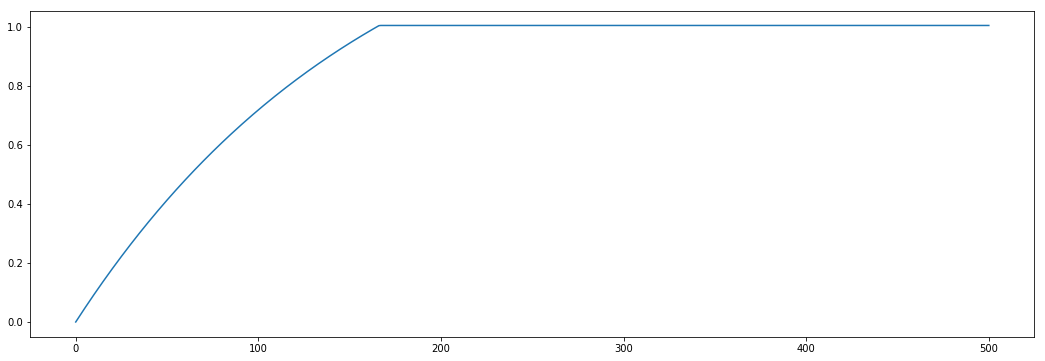

In [6]:
plot(exp_ramp(0.0, 1.0, 0.006, 0.63)[0])

reach 1.0 in 155 samples


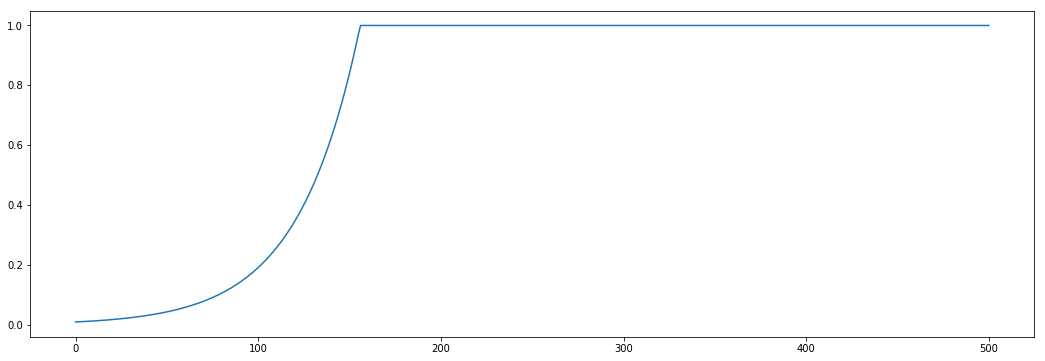

In [7]:
plot(naive_exponent(0.01, 1.0, 0.03)[0])

reach 1.0 in 500 samples


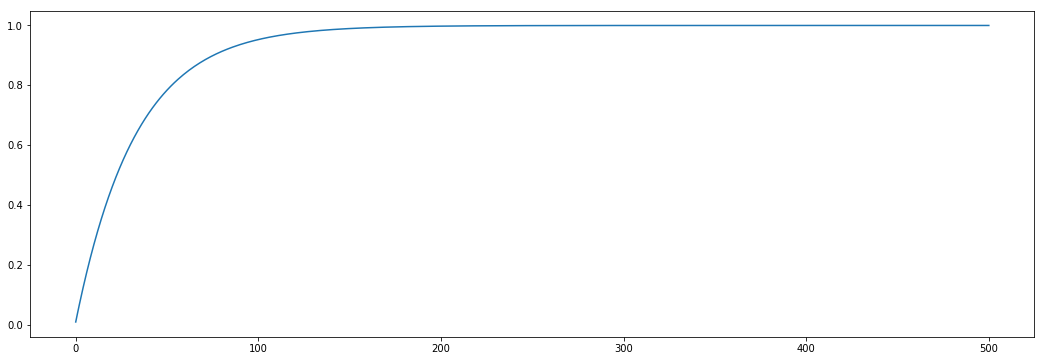

In [8]:
plot(naive_inverse_exponent(0.01, 1.0, 0.03)[0])

In [9]:
def gen_linear_ramp(start, end, size):
    step = (end - start) / size
    curr = start
    out = [curr]
    for i in range(0, size):
        curr += step
        out.append(curr)
    return np.array(out)
    
def plot_vs_lin(np_arr, relevant_size):
    plot(np_arr)
    plot(gen_linear_ramp(np_arr[0], np_arr[-1], relevant_size))

reach 1.0 in 500 samples


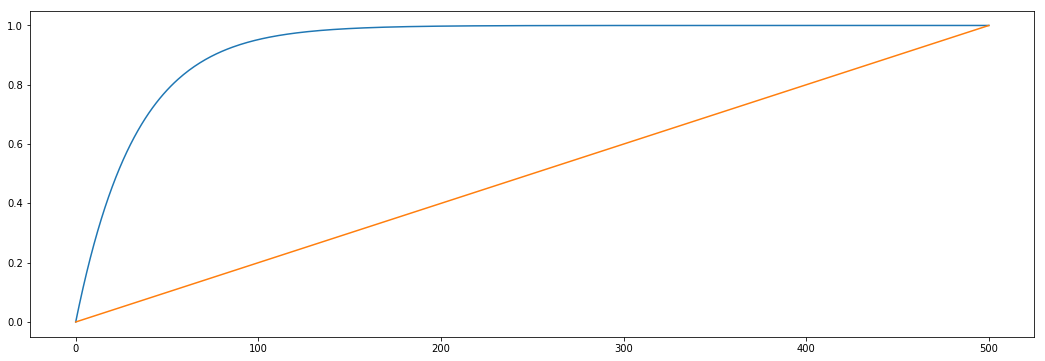

In [10]:
plot_vs_lin(*naive_inverse_exponent(0.000, 1.0, 0.03))

In [11]:
def close_inverse_exponent(current, target, attack, overshoot=0.1):
    out = current
    out_arr = [out]
    sample_count = 0
    fake_target = target + overshoot
    for i in range(0, 500):
        out += attack * (fake_target - out)
        if out > target:
            out = target
        else:
            sample_count += 1
        out_arr.append(out)
    print("reach %s in %s samples" % (target, sample_count))
    return np.array(out_arr), sample_count

reach 1.0 in 78 samples


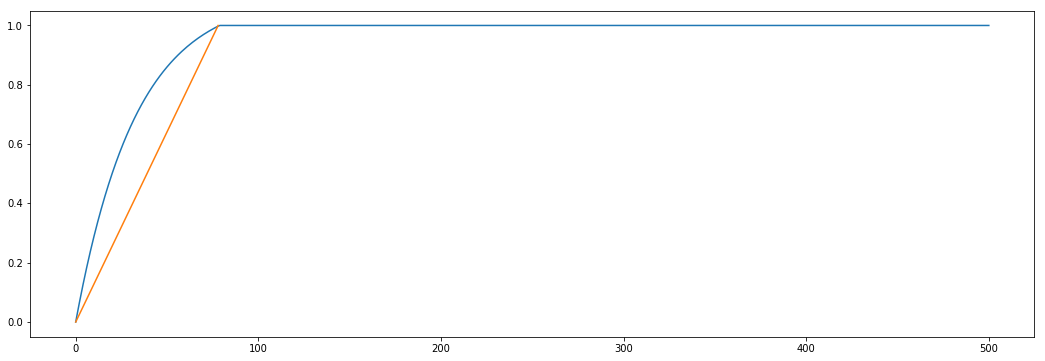

In [12]:
plot_vs_lin(*close_inverse_exponent(0.000, 1.0, 0.03))

reach 1.0 in 151 samples


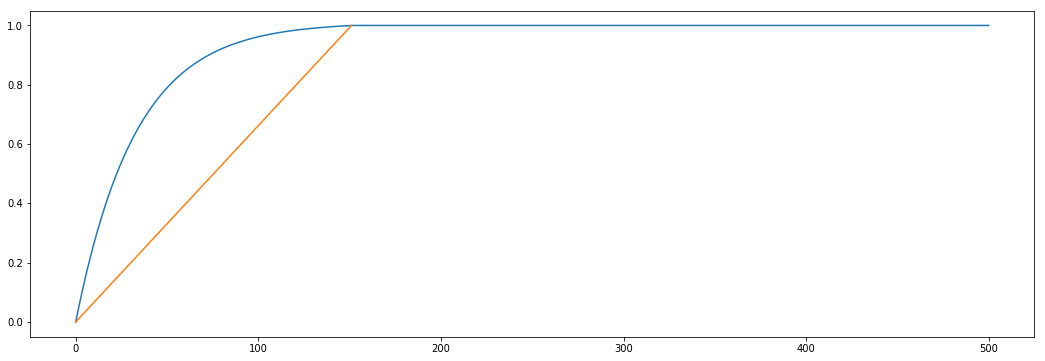

In [13]:
plot_vs_lin(*close_inverse_exponent(0.000, 1.0, 0.03, 0.01))

reach 1.0 in 226 samples


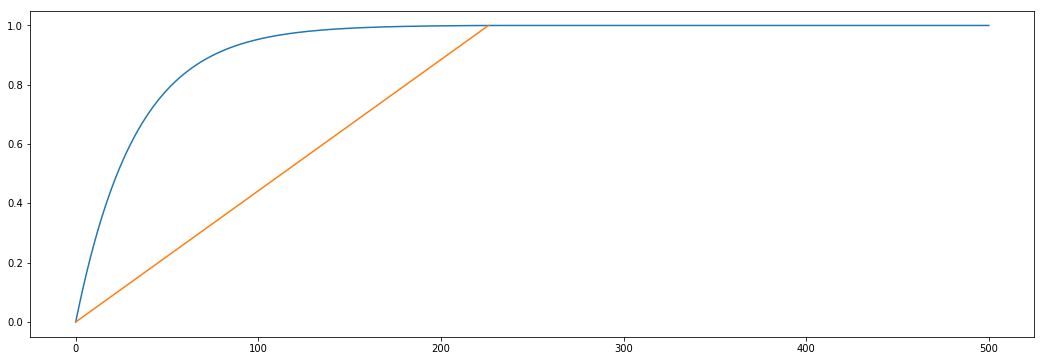

In [14]:
plot_vs_lin(*close_inverse_exponent(0.000, 1.0, 0.03, 0.001))

In [15]:
def scaled_exponent(start, target, attack_coef, overshoot_factor=0.1):
    offset = start
    scale = target - start
    
    out = 0.0
    out_arr = [offset]
    sample_count = 0
    fake_target = 1.0 + overshoot_factor
    for i in range(0, 500):
        out += attack_coef * (fake_target - out)
        if out > 1.0:
            out = 1.0
        else:
            sample_count += 1
        out_arr.append(offset + scale * out)
    print("reach %s in %s samples" % (target, sample_count))
    return np.array(out_arr), sample_count

reach 72 in 238 samples


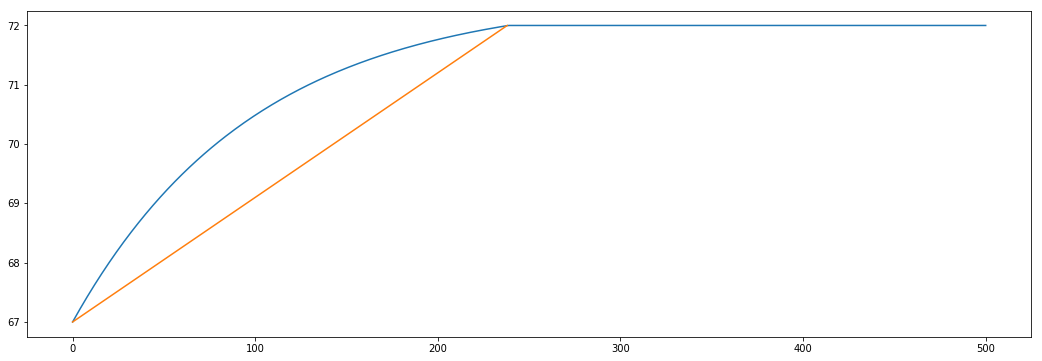

In [16]:
plot_vs_lin(*scaled_exponent(67, 72, 0.01, 0.1))

reach 72 in 500 samples


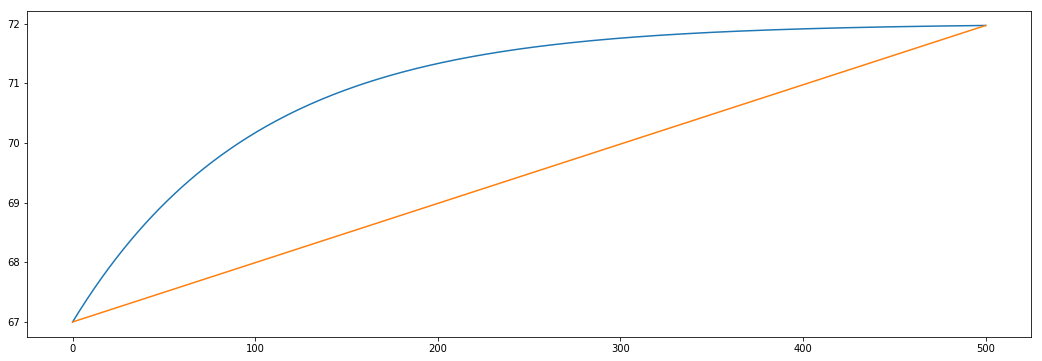

In [17]:
plot_vs_lin(*scaled_exponent(67, 72, 0.01, 0.001))

reach 72 in 145 samples


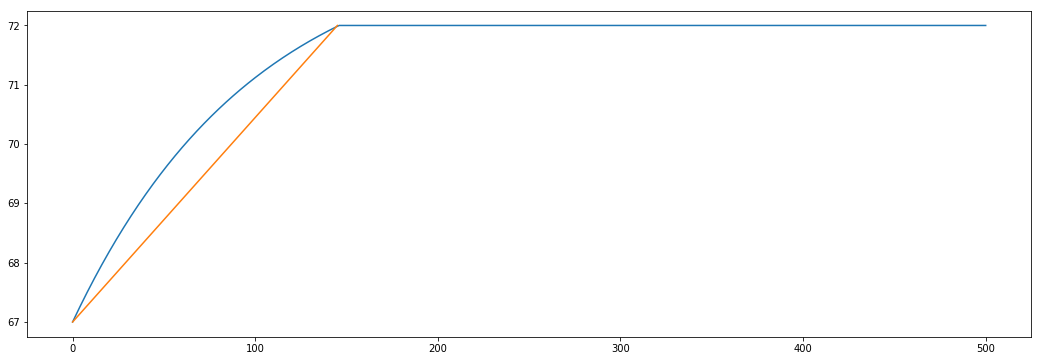

In [18]:
plot_vs_lin(*scaled_exponent(67, 72, 0.01, 0.3))

reach 72 in 109 samples


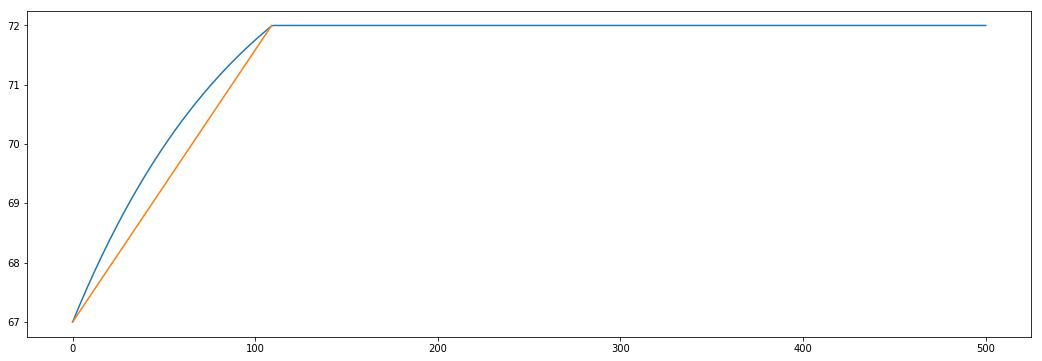

In [19]:
plot_vs_lin(*scaled_exponent(67, 72, 0.01, 0.5))

reach 72 in 98 samples


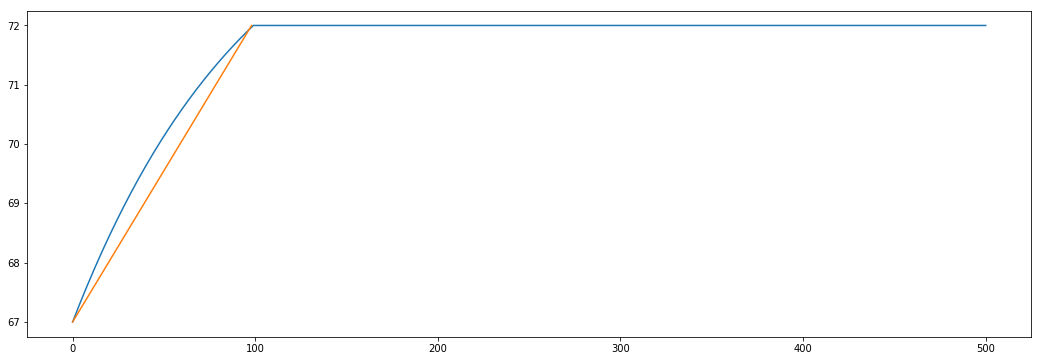

In [20]:
plot_vs_lin(*scaled_exponent(67, 72, 0.01, 0.587))

reach 72 in 178 samples


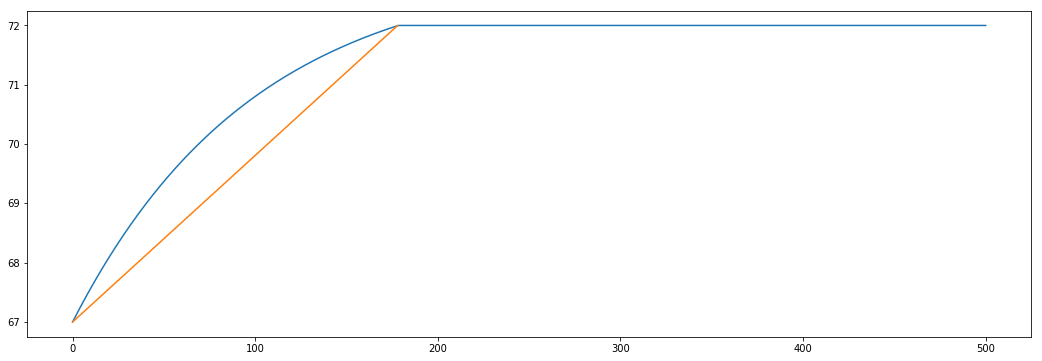

In [21]:
plot_vs_lin(*scaled_exponent(67, 72, 0.01, 0.2))

reach 87 in 178 samples


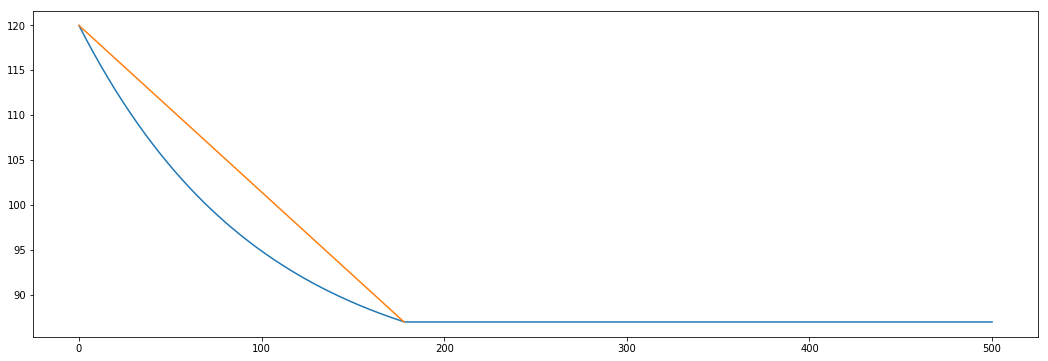

In [22]:
plot_vs_lin(*scaled_exponent(120, 87, 0.01, 0.2))

reach 87 in 302 samples


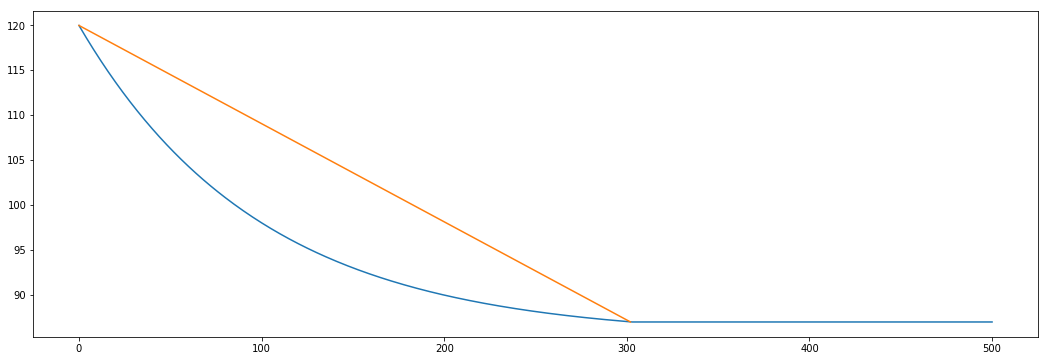

In [23]:
plot_vs_lin(*scaled_exponent(120, 87, 0.01, 0.05))

In [24]:
sample_rate = 44100
attack_ms = 100
attack_samples = sample_rate / 1000.0 * attack_ms
print("attack samples: %s" % attack_samples)

attack samples: 4410.0


In [25]:
def exp_ramp_ms(start, end, attack_ms, sample_rate, overshoot=0.1):
    attack_samples = floor(sample_rate / 1000.0 * attack_ms)
    print("expected attack samples: %s" % attack_samples)
    overshot_target = 1.0 + overshoot
    linearity = 1 / overshot_target
    attack_coef = np.e * linearity * linearity / attack_samples
    print("attack coef: %s" % attack_coef)
    # always start at 0, so the curve of the ramp stays consistent
    offset = start
    out_mult = end - start
    
    out = 0.0
    out_arr = [offset]
    sample_count = 0
    while 1:
        out += attack_coef * (overshot_target - out)
        out_arr.append(offset + (out_mult * out))
        if out > 1.0:
            out = 1.0
            break
        else:
            sample_count += 1
    print("reached target in %s samples" % sample_count)
    return np.array(out_arr), sample_count

expected attack samples: 4410.0
attack coef: 0.000509413584539
reached target in 4705 samples


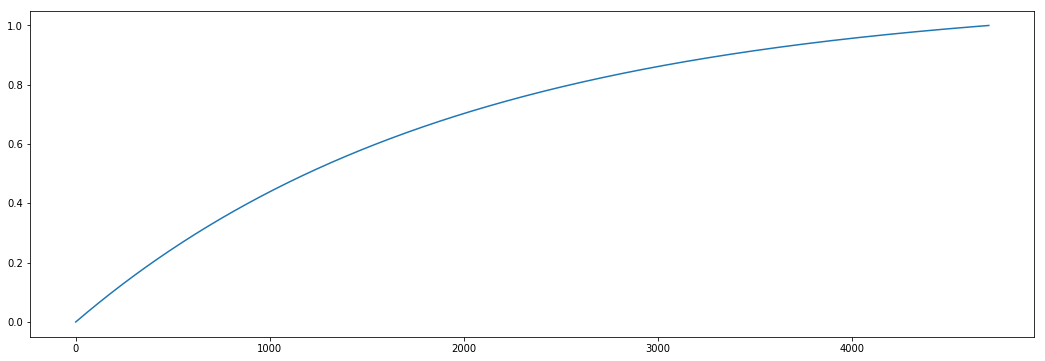

In [26]:
plot(exp_ramp_ms(0.0, 1.0, 100, 44100)[0])

expected attack samples: 1323.0
attack coef: 0.0016980452818
reached target in 1410 samples


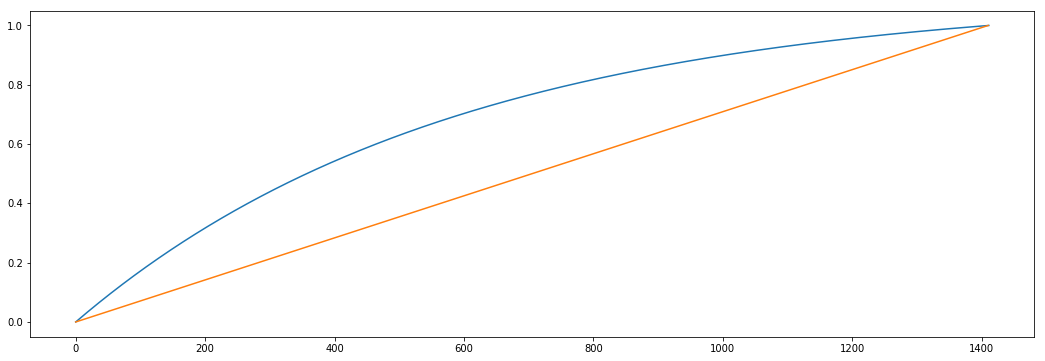

In [27]:
plot_vs_lin(*exp_ramp_ms(0.0, 1.0, 30, 44100))

expected attack samples: 1323.0
attack coef: 0.000815794521006
reached target in 1218 samples


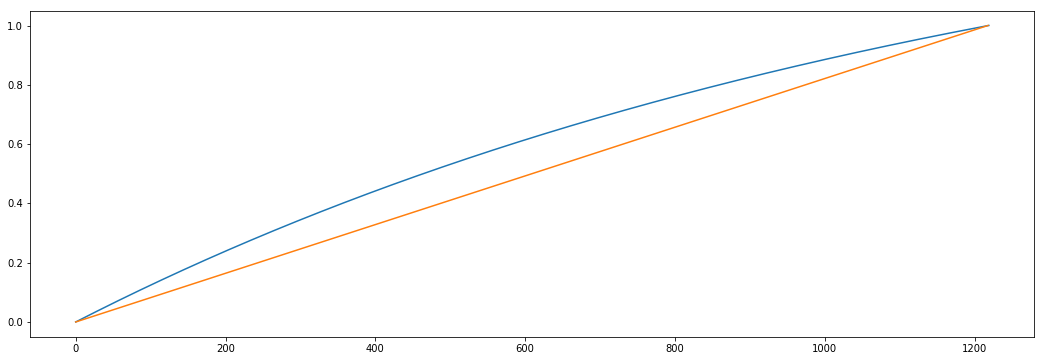

In [28]:
plot_vs_lin(*exp_ramp_ms(0.0, 1.0, 30, 44100, 0.587))

expected attack samples: 4410.0
attack coef: 0.000244738356302
reached target in 4063 samples


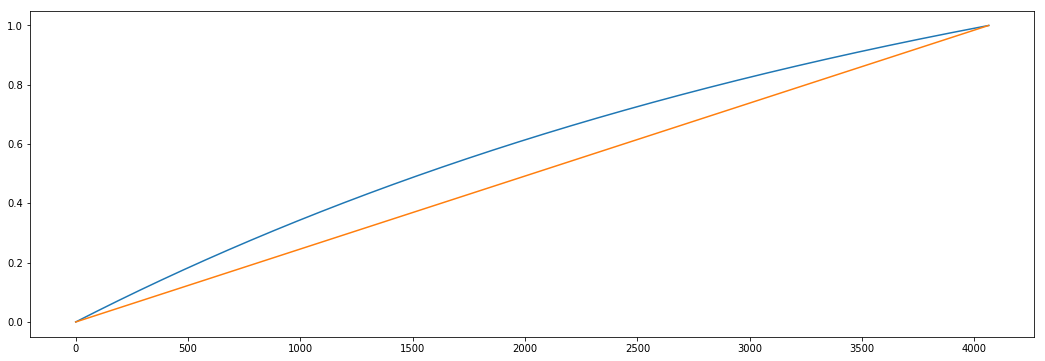

In [29]:
plot_vs_lin(*exp_ramp_ms(0.0, 1.0, 100, 44100, 0.587))

expected attack samples: 22050.0
attack coef: 4.89476712603e-05
reached target in 20318 samples


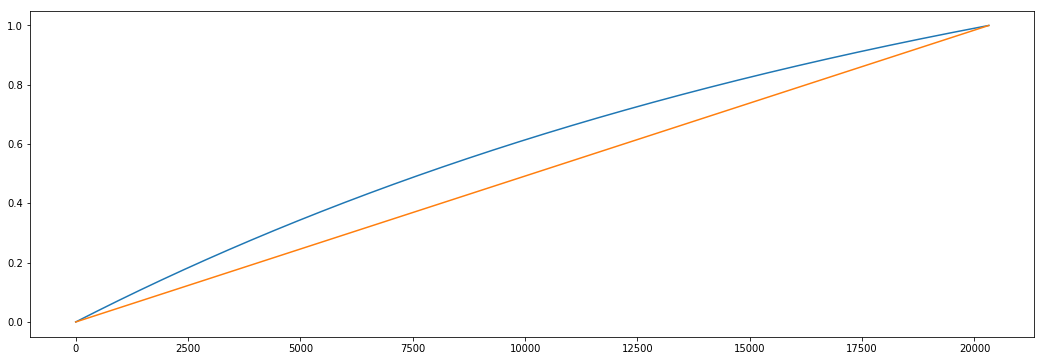

In [30]:
plot_vs_lin(*exp_ramp_ms(0.0, 1.0, 500, 44100, 0.587))

expected attack samples: 22050.0
attack coef: 6.96919483625e-05
reached target in 19999 samples


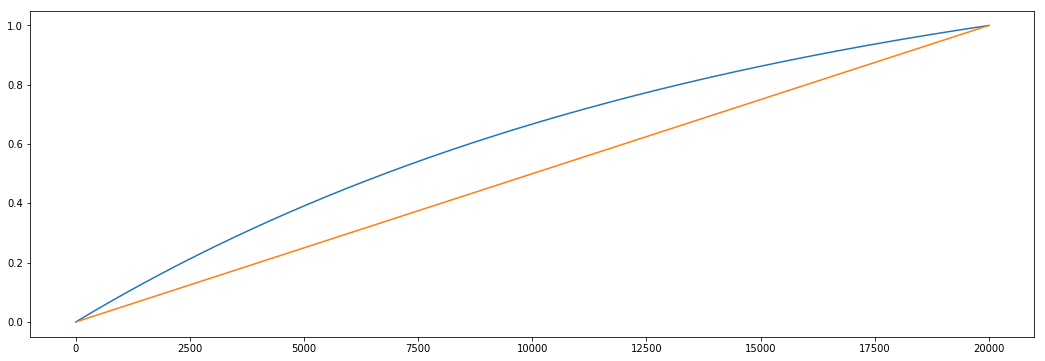

In [31]:
plot_vs_lin(*exp_ramp_ms(0.0, 1.0, 500, 44100, 0.33))

expected attack samples: 22050.0
attack coef: 5.47902610926e-05
reached target in 20050 samples


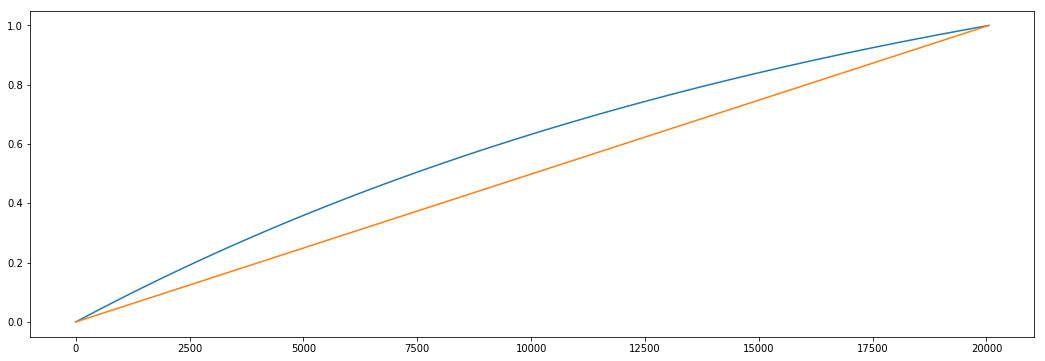

In [32]:
plot_vs_lin(*exp_ramp_ms(0.0, 1.0, 500, 44100, 0.5))

In [33]:
print("e: %s" % np.e)
print(type(np.e))
print("exp e: %s" % np.exp(1))
print(type(np.exp(1)))

e: 2.71828182846
<type 'float'>
exp e: 2.71828182846
<type 'numpy.float64'>


In [34]:
def exp_ramp_ms_exp(start, end, attack_ms, sample_rate, overshoot=0.1):
    attack_samples = floor(sample_rate / 1000.0 * attack_ms)
    print("expected attack samples: %s" % attack_samples)
    overshot_target = 1.0 + overshoot
    linearity = double(1 / overshot_target)
    attack_coef = np.exp(1) * linearity * linearity / attack_samples
    print("attack coef: %s" % attack_coef)
    # always start at 0, so the curve of the ramp stays consistent
    offset = start
    out_mult = end - start
    
    out = np.float64(0.0)
    out_arr = [offset]
    sample_count = 0
    while 1:
        out += attack_coef * (overshot_target - out)
        out_arr.append(offset + (out_mult * out))
        if out > 1.0:
            out = 1.0
            break
        else:
            sample_count += 1
    print("reached target in %s samples" % sample_count)
    return np.array(out_arr), sample_count

expected attack samples: 22050.0
attack coef: 6.96919483625e-05
reached target in 19999 samples
expected attack samples: 22050.0
attack coef: 6.96919483625e-05
reached target in 19999 samples


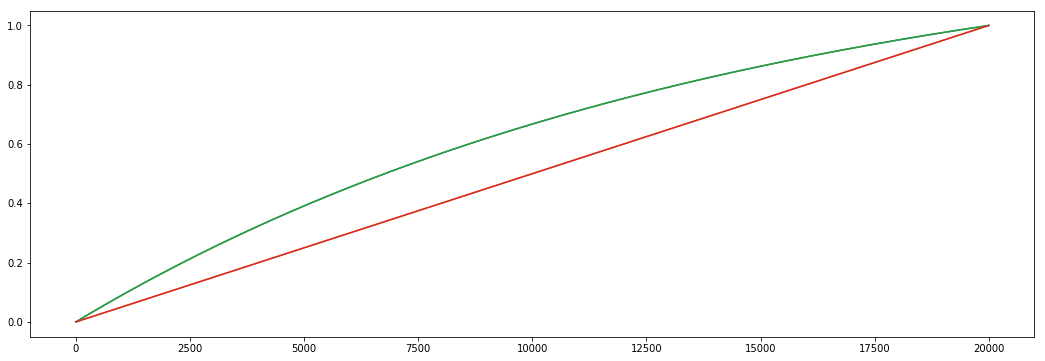

In [35]:
plot_vs_lin(*exp_ramp_ms(0.0, 1.0, 500, 44100, 0.33))
plot_vs_lin(*exp_ramp_ms_exp(0.0, 1.0, 500, 44100, 0.33))

expected attack samples: 22050.0
attack coef: 6.28969833972e-05
reached target in 19917 samples


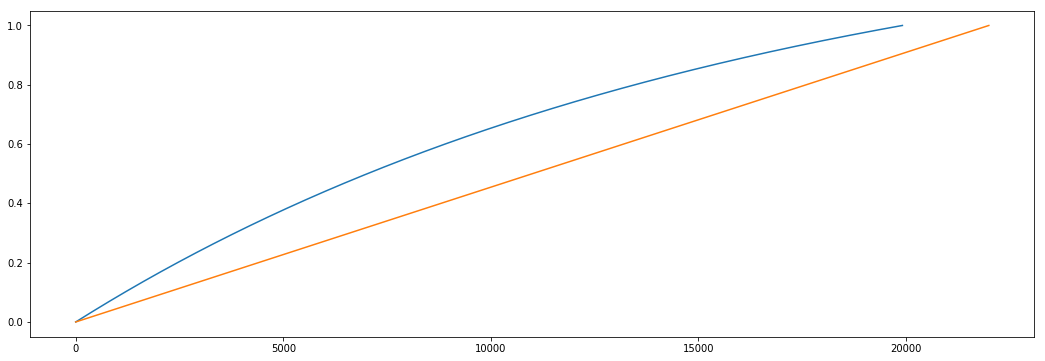

In [36]:
exp, _ = exp_ramp_ms(0.0, 1.0, 500, 44100, 0.4)
plot(exp)
plot(gen_linear_ramp(0.0, 1.0, 44100 / 1000 * 500))

In [37]:
def plot_attacks(start, end, attack_ms, sample_rate, overshoot):
    exp, _ = exp_ramp_ms(start, end, attack_ms, sample_rate, overshoot)
    plot(exp)
    plot(gen_linear_ramp(start, end, sample_rate / 1000 * attack_ms))

expected attack samples: 44100.0
attack coef: 5.59084296864e-05
reached target in 54453 samples


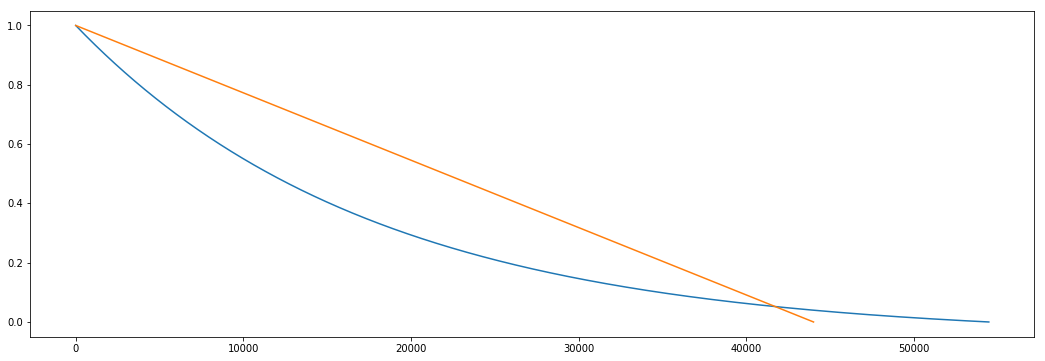

In [38]:
plot_attacks(1.0, 0.0, 1000, 44100, 0.05)

expected attack samples: 13230.0
attack coef: 0.000116153247271
reached target in 11999 samples


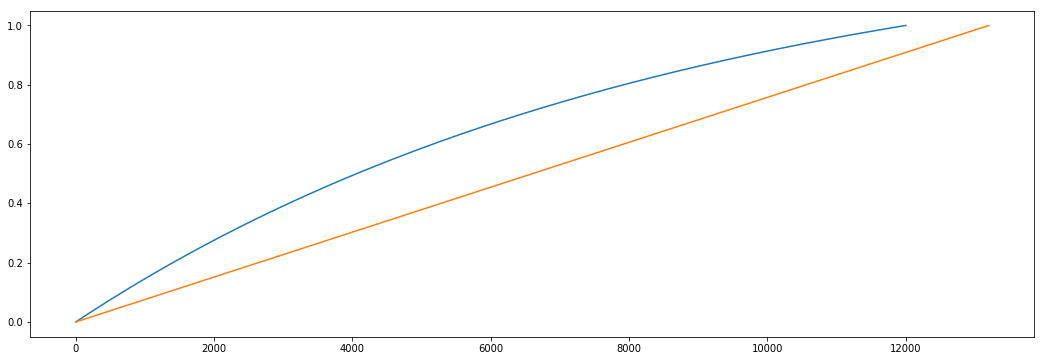

In [39]:
plot_attacks(0.0, 1.0, 300, 44100, 0.33)

In [43]:
def exp_ramp_ms_fix(start, end, attack_ms, sample_rate, overshoot=0.1):
    attack_samples = floor(sample_rate / 1000.0 * attack_ms)
    print("expected attack samples: %s" % attack_samples)
    
    overshot_target = 1.0 + overshoot
    linearity = 1 / overshot_target
    print("overshot: %s" % overshot_target)
    print("linearity: %s" % linearity)

    
    attack_coef = np.e * linearity * linearity / attack_samples
    print("original attack coef: %s" % attack_coef)

    # attack_coef = np.exp(1) * linearity * linearity / attack_samples
    # attack_coef = 1 - np.exp(np.log(linearity)/attack_samples)
    log_lin = np.log(linearity)
    print("log linearity: %s" % log_lin)
    print("log linearity / attack: %s" % (log_lin / attack_samples))
    
    log_over = np.log(overshoot)
    print("log overshoot: %s" % log_over)
    log_over_attack = log_over / attack_samples
    print("log overshoot / attack: %s" % log_over_attack)
    
    attack_coef = 1 - np.exp(np.log(overshoot)/attack_samples)
    print("new attack coef: %s" % attack_coef)
    
    # always start at 0, so the curve of the ramp stays consistent
    offset = start
    out_mult = end - start
    
    out = 0.0
    out_arr = [offset]
    sample_count = 0
    while 1:
        out += attack_coef * (overshot_target - out)
        out_arr.append(offset + (out_mult * out))
        if out > 1.0:
            out = 1.0
            break
        else:
            sample_count += 1
    print("reached target in %s samples" % sample_count)
    return np.array(out_arr), sample_count

In [44]:
def plot_fixed_attacks(start, end, attack_ms, sample_rate, overshoot):
    exp, _ = exp_ramp_ms(start, end, attack_ms, sample_rate, overshoot)
    plot(exp)
    plot(gen_linear_ramp(start, end, sample_rate / 1000 * attack_ms))
    fix_exp, _ = exp_ramp_ms_fix(start, end, attack_ms, sample_rate, overshoot)
    plot(fix_exp)

expected attack samples: 13230.0
attack coef: 0.000116153247271
reached target in 11999 samples
expected attack samples: 13230.0
overshot: 1.33
linearity: 0.751879699248
original attack coef: 0.000116153247271
log linearity: -0.285178942234
log linearity / attack: -2.15554756035e-05
log overshoot: -1.10866262452
log overshoot / attack: -8.37991401755e-05
new attack coef: 8.37956291256e-05
reached target in 16633 samples


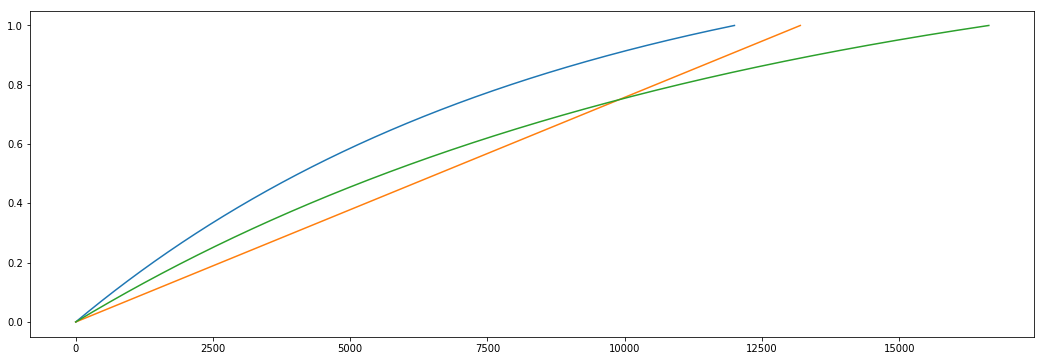

In [45]:
plot_fixed_attacks(0.0, 1.0, 300, 44100, 0.33)

In [ ]:
plot_fixed_attacks(1.0, 0.0, 1000, 44100, 0.05)